In [37]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px

df = pd.read_csv('https://raw.githubusercontent.com/devtlv/MiniProject-DataAnalysis-W6D5-Apple_Stock_Data/main/AAPL%2C%201D%2001012007-12072023.csv')

#check for null values
df.isnull().sum()

#convert unix timestamp to human time
df['Datetime'] = pd.to_datetime(df['time'], unit='s')

print(df.head())
print(df.info())


         volume    vwap    open   close    high     low        time  \
0  1.245445e+09  3.0302  3.0821  2.9929  3.0921  2.9250  1167800400   
1  8.554834e+08  3.0403  3.0018  3.0593  3.0696  2.9936  1167886800   
2  8.352580e+08  3.0426  3.0632  3.0375  3.0786  3.0143  1167973200   
3  7.974138e+08  3.0683  3.0700  3.0525  3.0904  3.0457  1168232400   
4  3.352007e+09  3.1946  3.0875  3.3061  3.3207  3.0411  1168318800   

   transactions            Datetime  
0        189737 2007-01-03 05:00:00  
1        136333 2007-01-04 05:00:00  
2        141050 2007-01-05 05:00:00  
3        130547 2007-01-08 05:00:00  
4        569578 2007-01-09 05:00:00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   volume        4159 non-null   float64       
 1   vwap          4159 non-null   float64       
 2   open          4159 non-null   floa

Uploaded Data, printed a display of the columns and first few rows, and checked for any null values which there aren't any.

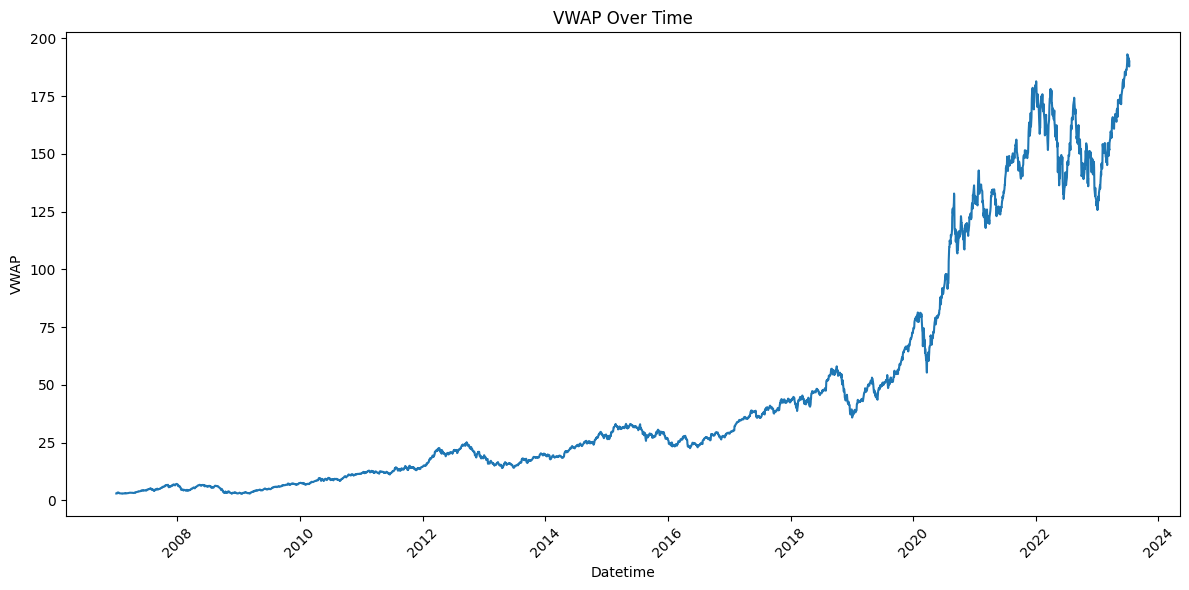

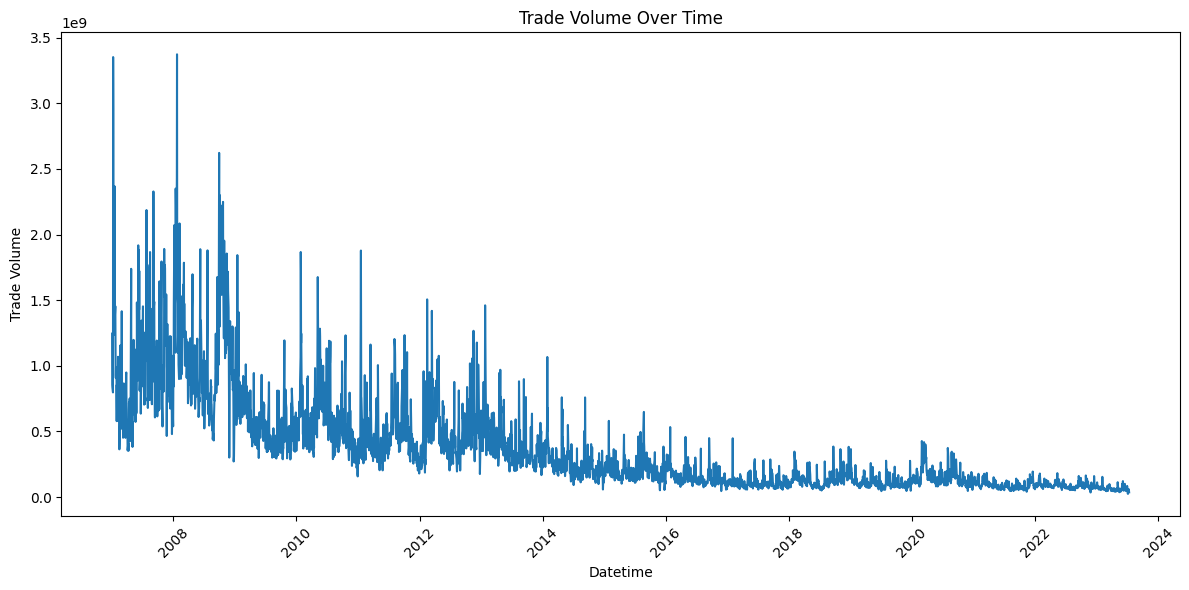

In [19]:

# Plot VWAP and Volume over time
df.set_index('Datetime', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['vwap'])
plt.xlabel('Datetime')
plt.ylabel('VWAP')
plt.title('VWAP Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df['volume'])
plt.xlabel('Datetime')
plt.ylabel('Trade Volume')
plt.title('Trade Volume Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Display visualy the overall trends in Volume-Weighted Average Price and Total Volume over the time period of available data. The volume of trades has trended down to a more stable place while their normalized value (VWAP) has trended up.

In [20]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.update_layout(title='Apple Stock Price',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()


This interactive visual "Candle-stick" plot shows positive and negative change from open to close and throughout the period high values and low values in stock price per user-varied degrees of detail.

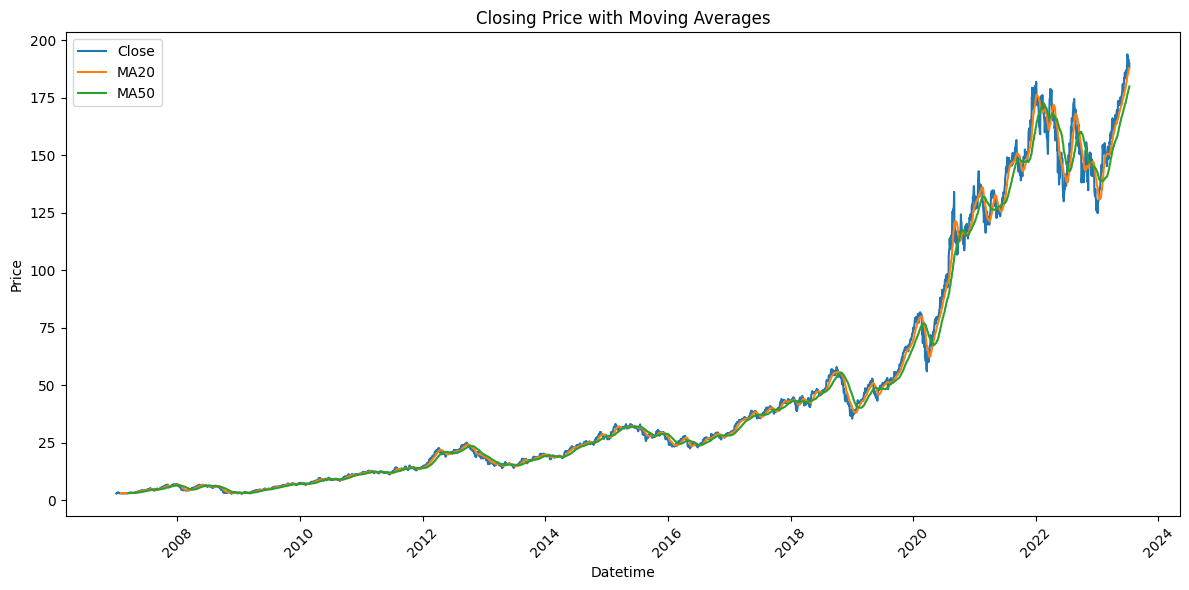

In [23]:
    df.set_index('Datetime', inplace=True)

    # Calculate moving averages (e.g., 20-day and 50-day)
    df['MA20'] = df['close'].rolling(window=20).mean()
    df['MA50'] = df['close'].rolling(window=50).mean()

    # Plot closing price and moving averages
    plt.figure(figsize=(12, 6))
    plt.plot(df['close'], label='Close')
    plt.plot(df['MA20'], label='MA20')
    plt.plot(df['MA50'], label='MA50')
    plt.xlabel('Datetime')
    plt.ylabel('Price')
    plt.title('Closing Price with Moving Averages')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

This line graph shows a comparison between the closing prices, rolling 20 day averages, and rolling 50 day averages. Disparities in the lines show volatility that was not captured in the average spans.

In [24]:
    key_columns = ['open', 'high', 'low', 'close', 'volume', 'vwap']

    # Calculate summary statistics
    summary_stats = df[key_columns].describe()
    print(summary_stats)


              open         high          low        close        volume  \
count  4159.000000  4159.000000  4159.000000  4159.000000  4.159000e+03   
mean     46.362788    46.881127    45.865790    46.396058  3.662925e+08   
std      50.235593    50.843874    49.680104    50.293482  3.724793e+08   
min       2.835400     2.928600     2.792900     2.792900  2.422234e+07   
25%      11.955700    12.028400    11.853600    11.947150  1.067497e+08   
50%      25.775000    26.262800    25.680000    25.825000  2.136463e+08   
75%      52.263750    52.626250    51.796250    52.231250  4.965321e+08   
max     193.780000   194.480000   191.760000   193.970000  3.373042e+09   

              vwap  
count  4159.000000  
mean     46.391382  
std      50.277557  
min       2.841000  
25%      11.936200  
50%      25.885200  
75%      52.154150  
max     193.102000  


This is a brief overview of the summary statistics on the main columns.


T-test for average closing prices between 2022 and 2023:
T-statistic: -4.47
P-value: 0.000
T-test for average closing prices between 2021 and 2022:
T-statistic: -11.19
P-value: 0.000
T-test for average closing prices between 2019 and 2020:
T-statistic: -29.34
P-value: 0.000
T-test for average closing prices between 2007 and 2008:
T-statistic: -4.46
P-value: 0.000


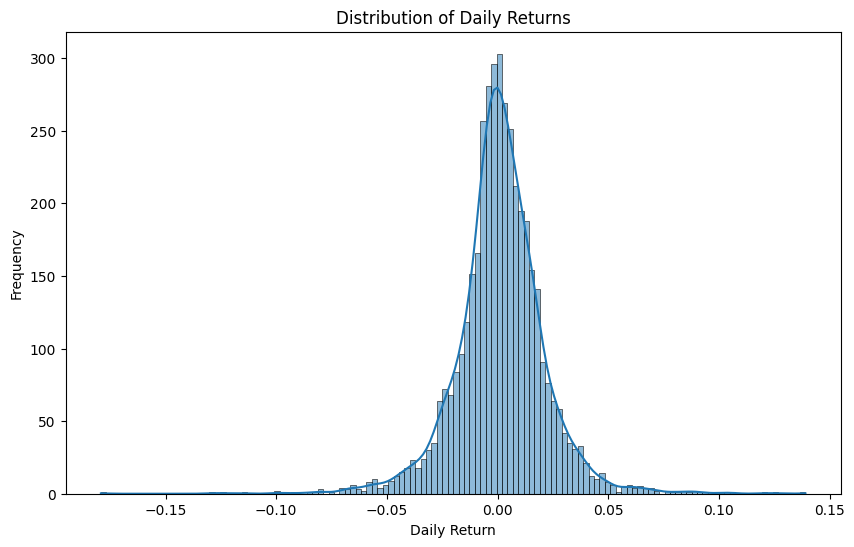


Shapiro-Wilk Test for Normality of Daily Returns:
Test Statistic: 0.941
P-value: 0.000


In [38]:
    df.set_index('Datetime', inplace=True)

    # Extract year from Datetime index
    df['Year'] = df.index.year

    # Group closing prices by year and calculate mean
    yearly_closing_prices = df.groupby('Year')['close'].mean()

    # Perform t-test for two specific years (e.g., 2022 and 2023)
    year1 = 2022
    year2 = 2023
    result = stats.ttest_ind(df[df['Year'] == year1]['close'],
                             df[df['Year'] == year2]['close'],
                             equal_var=False)  # Assuming unequal variances
    print(f"T-test for average closing prices between {year1} and {year2}:")
    print(f"T-statistic: {result.statistic:.2f}")
    print(f"P-value: {result.pvalue:.3f}")

        # Perform t-test for two specific years (e.g., 2022 and 2023)
    year1 = 2021
    year2 = 2022
    result = stats.ttest_ind(df[df['Year'] == year1]['close'],
                             df[df['Year'] == year2]['close'],
                             equal_var=False)  # Assuming unequal variances
    print(f"T-test for average closing prices between {year1} and {year2}:")
    print(f"T-statistic: {result.statistic:.2f}")
    print(f"P-value: {result.pvalue:.3f}")

    year1 = 2019
    year2 = 2020
    result = stats.ttest_ind(df[df['Year'] == year1]['close'],
                             df[df['Year'] == year2]['close'],
                             equal_var=False)  # Assuming unequal variances
    print(f"T-test for average closing prices between {year1} and {year2}:")
    print(f"T-statistic: {result.statistic:.2f}")
    print(f"P-value: {result.pvalue:.3f}")

    year1 = 2007
    year2 = 2008
    result = stats.ttest_ind(df[df['Year'] == year1]['close'],
                             df[df['Year'] == year2]['close'],
                             equal_var=False)  # Assuming unequal variances
    print(f"T-test for average closing prices between {year1} and {year2}:")
    print(f"T-statistic: {result.statistic:.2f}")
    print(f"P-value: {result.pvalue:.3f}")

    # Calculate daily returns
    df['Daily Return'] = df['close'].pct_change()

    # Plot distribution of daily returns
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Daily Return'].dropna(), kde=True)
    plt.title('Distribution of Daily Returns')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.show()

    # Test for normality of daily returns using Shapiro-Wilk test
    normality_test = stats.shapiro(df['Daily Return'].dropna())
    print("\nShapiro-Wilk Test for Normality of Daily Returns:")
    print(f"Test Statistic: {normality_test.statistic:.3f}")
    print(f"P-value: {normality_test.pvalue:.3f}")

Here are a few relevant t-test comparisons between most recent concurrent years and the two documented instances of financial crisis within this data, the 2008 housing market recession and the 2020 Coronavirus pandemic. All tests showed statistically significant differences, however by the crisis years, they seemed to have a significant increase rather than a decrease, suggesting a degree of stability and essential dependence. Lastly, the distribution of daily change in returns shows a normal and non skewed distribution.